# The Su-Schrieffer-Heeger(SSH) model

The Su-Schrieffer-Heeger (SSH) model was constructed to describe the electronic properties of polymer chains. As a one-dimensional system it of- fers the simplest demonstration of concepts of edge states and topological electronic states, which are a central topic of condensed-matter physics in the past decades.

Both the SSH model and the Rice-Mele (RM) model are defined on the same chain of lattice sites along which an electron can hop. In the SSH model there are exactly two types of hopping whose energies are $t_{1}$, $t_2$ and they alternate along the chain, producing a unit-cell with two atoms (A and B):

<img src='https://drive.google.com/uc?id=1V5UOubwUue-RKpo8HZnbA5MMepf_u_r3' width="500">

The RM model adds an on-site potential $\pm\epsilon$ on all A(B) sites. Combined, for an open chain of $N$ unit-cells the tight-binding Hamiltonian used in this notebook is in the form:
$$H_N=\sum_{i=1}^{2N} t_{i,i+1}\left(|\phi_{i+1}\rangle\langle\phi_i|+|\phi_i\rangle\langle\phi_{i+1}|\right)-(-1)^i \epsilon|\phi_{i}\rangle\langle\phi_i|,\;\;\;\;t_{i,i+1}\equiv\begin{cases}t_1,&i\in\textrm{odd}\\t_2,&i\in\textrm{even}\\\end{cases},$$
where $\epsilon\equiv0$ in the SSH model, while $|\phi_i\rangle$ are and orthonormalized basis of states of electron localized on site $i$.

For an infinite chain the bandstructure is: $$E_\pm(k)=\pm\sqrt{t_1^2+t_2^2+2t_1 t_2 cos(k)},$$ with the first Brillouin zone given by $k\in[-\pi,\pi)$, and we set the lattice constant (i.e., the $A-A$ distance) $a\equiv1$ throughout.

For a finite chain with periodic boundary conditions (PBC), the discrete spectrum is given by $E_\pm(k_m)$, where $k_m=2\pi\frac{m}{N}$ with $m=0,1\ldots N-1$ (which is equivalent to $k$ values in the first BZ).


------------
## Import python packages, define constants

In [1]:
import numpy as np
from numpy import linalg as LA
# import sympy as sp
# from sympy.functions import exp
from matplotlib import pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Pi=np.pi

## Define and solve SSH models with PBC
### Infinite chain with PBC: Bands

**ssh_PBC_bands($t_1$,$t_2$,$\epsilon$)** is a class containing the continuous bands of an infinite chain.

**plot_bands($k_{min}$,$k_{max}$,$T_1$,$T_2$)** function plots two panels: (left) The bandstructure over the range $k\in[k_{min},k_{max}]$, after imposing the new values $t_1\equiv T_1$, $t_2\equiv T_2$; (right) The trace of $f^*_k$ in the complex plane (blue dot is the origin), over the range of $k$.

In [2]:
class ssh_PBC_bands:
  def __init__(self,t1,t2,eps=0):
    self.t1=t1
    self.t2=t2
    self.eps=eps
    self.nrofbands=2
  def bands(self,k):
    return [-np.sqrt(self.eps**2+self.t1**2+self.t2**2+2*self.t1*self.t2*np.cos(k)),np.sqrt(self.eps**2+self.t1**2+self.t2**2+2*self.t1*self.t2*np.cos(k))]
  def H12(self,k):
    return self.t1+self.t2*np.exp(1j*k)
  def plot_bands(self,kmin,kmax,newt1,newt2):
    self.t1=newt1
    self.t2=newt2
    ks = np.linspace(kmin, kmax)
    spectrum=np.empty((len(ks),self.nrofbands))
    for i in range(len(ks)):
      spectrum[i]=(self.bands(ks[i])/np.abs(self.t1))
    spectrum=np.transpose(spectrum)
    #print(spectrum)
    ### Plot
    fig, ax=plt.subplots(1,2,figsize=(6,4))
    ax[0].set_xlim(kmin, kmax)
    ax[0].set_xticks(np.arange(np.ceil(kmin),np.ceil(kmax)))
    ax[0].set_xlabel("$k$")
    ymax = 1.1*(np.abs(self.t1)+np.abs(self.t2))
    ax[0].set_ylim(-ymax, ymax)
    ax[0].set_yticks([-np.abs(self.t1+self.t2),0,np.abs(self.t1+self.t2),np.abs(self.t1-self.t2)])
    ax[0].set_ylabel("$E/|t_1|$")
    ax[0].set_title("Infinite chain bands: $t_1=$"+str(self.t1)+", $t_2=$"+str(self.t2))
    ###
    for i in range(self.nrofbands):
      ax[0].plot(ks, spectrum[i], "black")

    emax=1.1*(np.abs(self.t1)+np.abs(self.t2))
    ax[1].set_aspect('equal','box')
    ax[1].set_xlim(-emax,emax)
    ax[1].set_xticks([-np.abs(self.t1)-np.abs(self.t2),0,np.abs(self.t1)+np.abs(self.t2)])
    ax[1].set_xlabel("Re[$H_{12}(k)$]")
    ax[1].set_ylim(-emax,emax)
    ax[1].set_yticks([-np.abs(self.t1)-np.abs(self.t2),0,np.abs(self.t1)+np.abs(self.t2)])
    ax[1].set_ylabel("Im[$H_{12}(k)$]")
    ax[1].set_title("Winding: $t_1=$"+str(self.t1)+", $t_2=$"+str(self.t2))
    ###
    ax[1].plot(np.real(self.H12(ks)),np.imag(self.H12(ks)), "blue")
    ax[1].scatter([0],[0])

    plt.tight_layout()
    plt.show()

#CHECK the PBC spectrum
#testm=sp.Matrix([[eps, t1+t2*exp(1j*k)], [t1+t2*exp(-1j*k), -eps]])
#t1, t2, k, eps = sp.symbols('t1 t2 k eps')
#print("Eigenvalues:")
#print(testm.eigenvals())

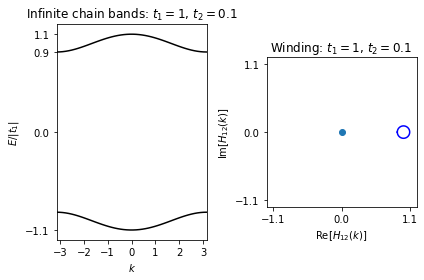

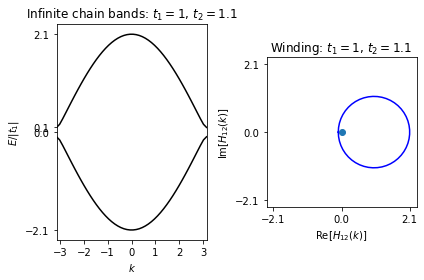

In [3]:
eps=0
ssh_PBC_bands(1,0.1,eps).plot_bands(-Pi,Pi,1,0.1)
ssh_PBC_bands(1,1.1,eps).plot_bands(-Pi,Pi,1,1.1)

### Interactive bands
A slider to change value of $t_2$ in real-time, with fixed values $t_1,\epsilon$.

In [4]:
t1=1
intb=ssh_PBC_bands(t1,0,0)
def f(t2):
    return intb.plot_bands(-Pi,Pi,t1,t2)
interact(f,t2=widgets.FloatSlider(min=-2,max=2,step=0.05,value=0));

interactive(children=(FloatSlider(value=0.0, description='t2', max=2.0, min=-2.0, step=0.05), Output()), _dom_…

-------------------